# **The Perceptron**

In [7]:
import numpy as np  # Importing the NumPy library, which is essential for efficient array operations.
import pandas as pd  # Importing the Pandas library, though it isn't used here, could be useful for data manipulation.
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting graphs, also not used in this code, but useful for visualization.

# Define the class for the Single Layer Perceptron
class SingleLayerPerceptron:

    # Initialize the Perceptron with weights, bias, and learning rate
    def __init__(self, my_weights, my_bias, learningRate=0.05):
        # `my_weights` is the list of initial weights assigned to the perceptron
        self.weights = my_weights  # The weights are stored as an attribute.

        # `my_bias` is the bias term that is used to shift the output
        self.bias = my_bias  # The bias is also stored as an attribute.

        # `learningRate` defines the step size for weight and bias updates during training
        self.learningRate = learningRate  # The learning rate is set to 0.05 by default if not provided.

    # Define the activation function for the perceptron (binary step function)
    def activation(self, net):
        # This function checks if the weighted sum (net) is greater than 0 or not.
        # If it's greater than 0, it returns 1 (active), otherwise 0 (inactive).
        answer = 1 if net > 0 else 0  # This is the step function.
        return answer  # Returning the activation result (either 0 or 1).

    # Define the function to calculate the weighted sum (neuron's input) for the perceptron
    def neuron(self, inputs):
        # The weighted sum (net input to the neuron) is calculated as the dot product of weights and inputs, plus the bias.
        neuronArchitecture = np.dot(self.weights, inputs) + self.bias
        return neuronArchitecture  # Returning the net input to the neuron.

    # Define the propagation function for the neuron (combining `neuron` and `activation`)
    def neuron_propagate(self, inputs):
        # First calculate the net input using the `neuron` method.
        processing = self.neuron(inputs)

        # Then, apply the activation function to the net input.
        return self.activation(processing)  # Return the activated output (either 0 or 1).

    # Define the training method for the perceptron
    def training(self, inputs, output):
        # First, compute the predicted output (`output_prev`) for the given `inputs`.
        output_prev = self.neuron_propagate(inputs)

        # Update the weights using the perceptron learning rule:
        # The weights are adjusted based on the difference between the expected and predicted output,
        # scaled by the learning rate and the input values.
        self.weights = [W + X * self.learningRate * (output - output_prev)
                       for (W, X) in zip(self.weights, inputs)]

        # Update the bias similarly, based on the output difference and learning rate.
        self.bias += self.learningRate * (output - output_prev)

        # Calculate the error as the absolute difference between the predicted and expected output.
        error_calculation = np.abs(output_prev - output)

        # Return the error calculation for analysis during training.
        return error_calculation


In [8]:
# Create a DataFrame using pandas
data = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))

# Display the first few rows of the DataFrame
data.head()

,x1,x2
0,0.768704,0.178700
1,0.687774,0.555387
2,0.599974,0.026011
3,0.102613,0.370385
4,0.150044,0.915502


In [9]:
# Define a function to plot and display the dataset
def show_dataset(data, ax):
    # Plot the data points where 'y' equals 1 with blue color
    data[data.y == 1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')

    # Plot the data points where 'y' equals 0 with red color
    data[data.y == 0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')

    # Add a grid to the plot for better readability
    plt.grid()

    # Set the title of the plot
    plt.title(' My Dataset')

    # Set the x and y axis limits to provide a consistent view
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)

# Define a function to calculate the class label 'y' based on the sum of inputs
def testing(inputs):
    # If the sum of the inputs (x1 + x2) is greater than 1, classify as 1 (positive class), otherwise 0
    answer = int(np.sum(inputs) > 1)
    return answer

# Apply the 'testing' function to each row in the data to create the 'y' column
data['y'] = data.apply(testing, axis=1)

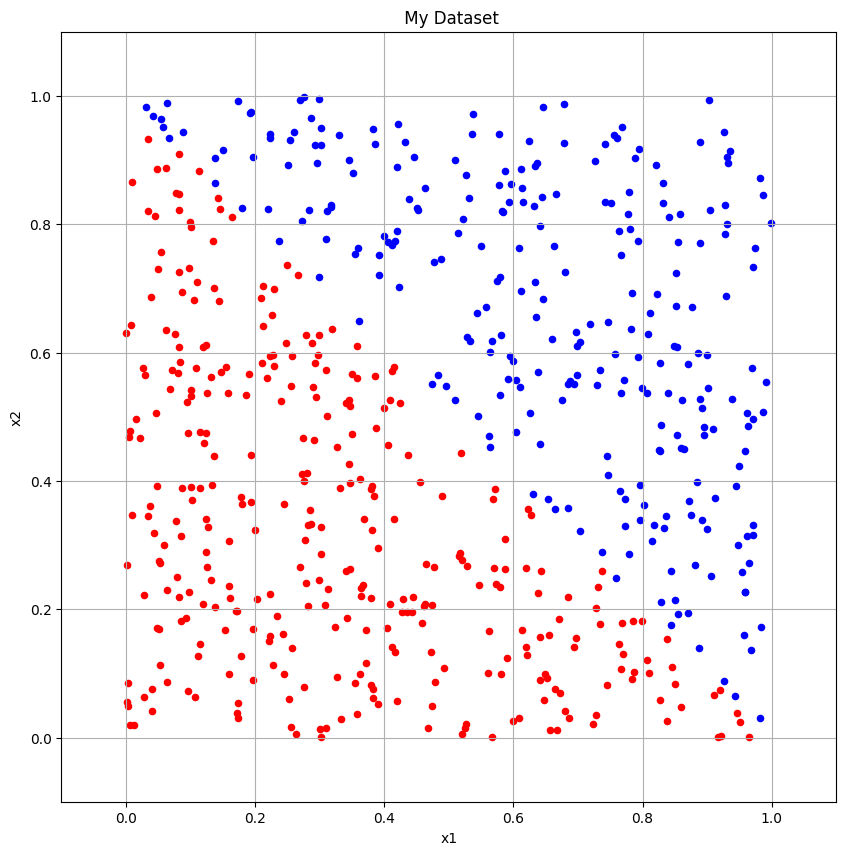

In [10]:
# Create a figure for plotting with a specified size of 10x10 inches
fig = plt.figure(figsize=(10,10))

# Call the show_dataset function to plot the data on the current axes of the figure
show_dataset(data, fig.gca())

In [11]:
# Define initial weights, bias, and learning rate for the perceptron
InitialWeights = [0.1, 0.1]   # Initial weights for the perceptron
InitialBias = 0.01            # Initial bias for the perceptron
LearningRate = 0.1            # Learning rate used to update weights and bias

# Create an instance of the SingleLayerPerceptron class with the specified parameters
SLperceptron = SingleLayerPerceptron(InitialWeights,
                                     InitialBias,
                                     LearningRate)

<ipython-input-12-7f1457c5da6d>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count += SinglePerceptron.training(line[0:2], line[2])
<ipython-input-12-7f1457c5da6d>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count += SinglePerceptron.training(line[0:2], line[2])
<ipython-input-12-7f1457c5da6d>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count += SinglePerceptron.training(line[0:2], line[2])
<ipython-input-12-7f1457c

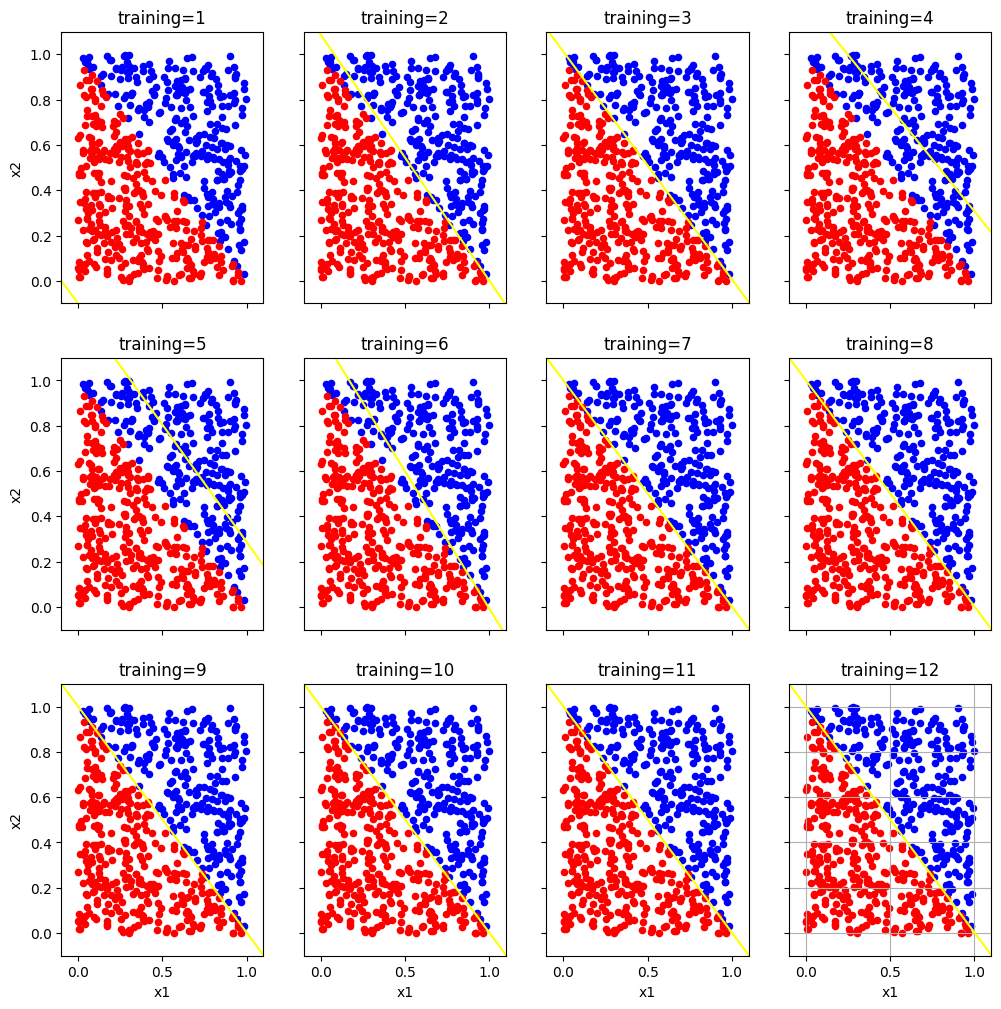

In [12]:
import random, itertools

# Function to display the dataset and the decision boundary (threshold) for the perceptron
def showAll(perceptron, data, threshold, ax=None):
    if ax == None:
        # Create a new figure and axes if none are provided
        fig = plt.figure(figsize=(5, 4))
        ax = fig.gca()

    # Show the dataset and the decision threshold
    show_dataset(data, ax)
    show_threshold(perceptron, ax)

    # Set the title of the plot based on the threshold iteration
    title = 'training={}'.format(threshold + 1)
    ax.set_title(title)

# Function to perform one iteration of training using the perceptron
def trainingData(SinglePerceptron, inputs):
    count = 0
    # Iterate over each row of the input data and train the perceptron
    for i, line in inputs.iterrows():
        # Train the perceptron using the inputs (x1, x2) and the expected output (y)
        count += SinglePerceptron.training(line[0:2], line[2])
    return count

# Function to calculate the threshold line based on the perceptron's weights and bias
def limit(neuron, inputs):
    weights_0 = neuron.weights[0]  # Weight for x1
    weights_1 = neuron.weights[1]  # Weight for x2
    bias = neuron.bias  # Bias term

    # Calculate the threshold value for x2 based on the line equation
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1  # Solve for x2
    return threshold

# Function to display the decision boundary (threshold) for the perceptron
def show_threshold(SinglePerceptron, ax):
    # Get the current x and y axis limits of the plot
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    # Calculate the threshold line for each x1 value in the xlim range
    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]

    # Plot the threshold line (decision boundary) in yellow
    ax.plot(xlim, x2, color="yellow")

    # Set the axis limits for better visualization
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)

# Create a 3x4 grid of subplots for visualizing the training process
f, axarr = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12, 12))

# Flatten the array of axes for easier iteration
axs = list(itertools.chain.from_iterable(axarr))

until = 12  # Number of training iterations to visualize

# Run the training process for 'until' iterations and display the results
for interaction in range(until):
    # Show the dataset and decision boundary at the current threshold iteration
    showAll(SLperceptron, data, interaction, ax=axs[interaction])

    # Train the perceptron with the input data
    trainingData(SLperceptron, data)